# Project Description 

*The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!*


The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
`Id number: 1 to 214
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)`


`1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps`
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


`Predict` : Type of glass

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
# creating the copy of the data 
df = data.copy()

# Store the existing column names in a separate variable
existing_column_names = df.columns.tolist()

# creating column names 
columns = ['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']

# Update the column names in the DataFrame
df.columns = columns

# Restore the first row with the original column names
df.iloc[0] = existing_column_names

# Optional: Reset the index if needed
df.reset_index(drop=True, inplace=True)

df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
df.skew()

Id_number       -0.000461
RI               1.618936
Na               0.461660
Mg              -1.145388
Al               0.902994
Si              -0.727374
K                6.536201
Ca               2.042537
Ba               3.406749
Type_of_glass    1.109264
dtype: float64

* RI , MG , K ,CA,BA have skewness . we will fix that .

In [4]:
df.shape

(213, 11)

In [5]:
# getting basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id_number      213 non-null    object
 1   RI             213 non-null    object
 2   Na             213 non-null    object
 3   Mg             213 non-null    object
 4   Al             213 non-null    object
 5   Si             213 non-null    object
 6   K              213 non-null    object
 7   Ca             213 non-null    object
 8   Ba             213 non-null    object
 9   Fe             213 non-null    object
 10  Type_of_glass  213 non-null    object
dtypes: object(11)
memory usage: 18.4+ KB


In [6]:
#checking duplicates
df.duplicated().sum()

0

* no duplicates in the dataset

In [7]:
# dropping the id number column
df.drop('Id_number',axis = 1,inplace = True)

In [8]:
features = df.columns[:-1].tolist()

In [9]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

* no null values in the data 

In [10]:
# getting stats of the dataset
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,213.0000,213.00,213.0,213.00,213.00,213.0,213.00,213.0,213.0,213
unique,178.0000,143.00,94.0,118.00,133.00,65.0,144.00,35.0,33.0,7
top,1.5159,13.21,0.0,1.54,73.11,0.0,8.03,0.0,0.0,2
freq,3.0000,5.00,42.0,8.00,4.00,30.0,5.00,174.0,142.0,76


* observation = k and Ca have very big gap between 75% and max and Ca and Ba have have mean but zero min ,25%, 75%, median . the reason behind this maybe they are not getting used in any glass making processes. .

In [11]:
# checking the value counts
for column in df.columns:
    print(df[column].value_counts())

1.51590    3
1.52152    3
1.51645    3
1.51768    2
1.51969    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.31    1
14.17    1
13.51    1
13.81    1
14.23    1
Name: Na, Length: 143, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.29    5
1.56    5
1.43    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
73.11    4
72.86    4
73.10    4
72.99    4
73.28    4
        ..
72.34    1
72.26    1
73.26    1
73.25    1
73.61    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
8.03    5
8.43    5
9.57    4
8.44    4
8.79    4


* after looking into the value counts of the data. The `fe` has a value which is invlaid .

In [12]:
# fixing the fe 

df.loc[df['Fe'].isin(['0.00.1'])]
df['Fe'].replace('0.00.1','0.1',inplace=True)

* fixing a value in fe column.

In [13]:
# changing the datatype to float
df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type_of_glass']]=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type_of_glass']].astype(float)
# target dtype int

df['Type_of_glass'] = df['Type_of_glass'].astype(int)

* change the data type of the dataset in to float for the features and int for the target variable.

In [14]:
# There is a wrong value in the target column lets fix it
df['Type_of_glass'].unique()

# replacing the value with mode 
df['Type_of_glass'] = df['Type_of_glass'].replace(1.1, df['Type_of_glass'].mode()[0])



* The target have descret values in it . but there is  one float value present in the target . now the problem of the value wrong value is cured

In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.10,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [16]:
df['Type_of_glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

In [17]:
df['glass_type'] = df['Type_of_glass'].apply(lambda x: 0 if x in [1, 2, 3, 4] else 1)


As in the description of the dataset there is clearly mentioned to convert the first four into zero and other are one in target variable .so that's why we done that .

df.head()

In [18]:
df['glass_type'].value_counts()

0    162
1     51
Name: glass_type, dtype: int64

In [19]:
df = df.drop('Type_of_glass', axis=1)


In [20]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.10,0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,0
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0


# Data Visualization 

## Univariate analysis

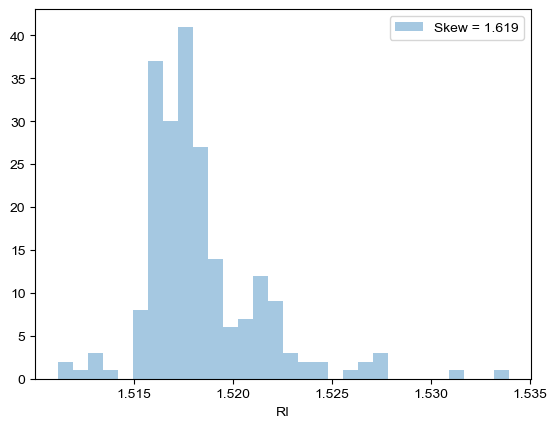

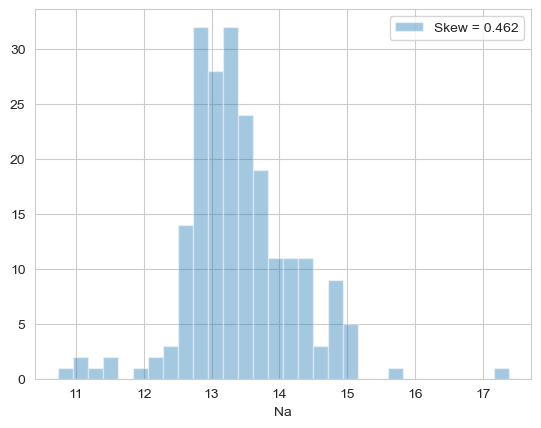

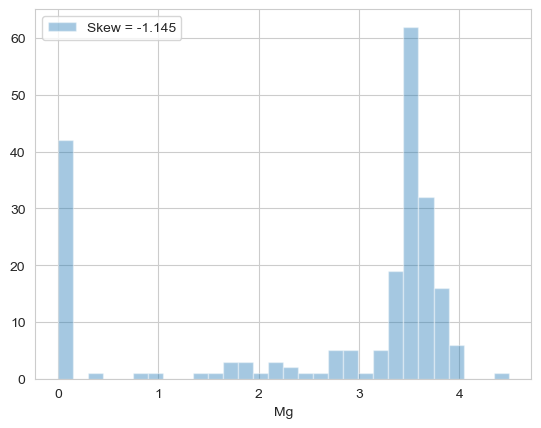

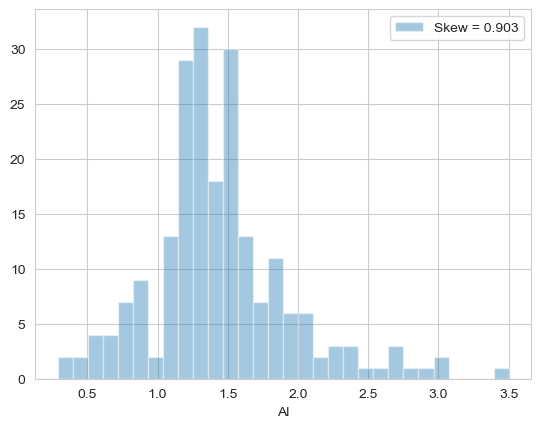

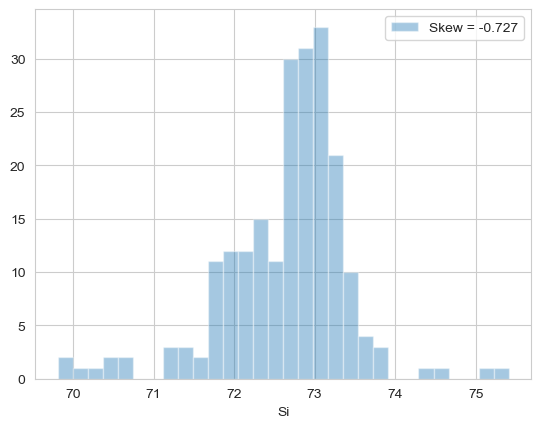

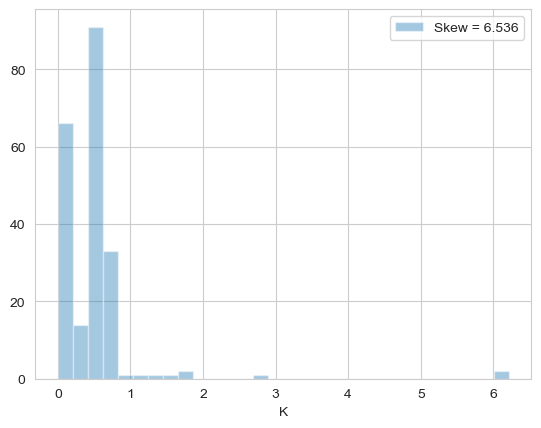

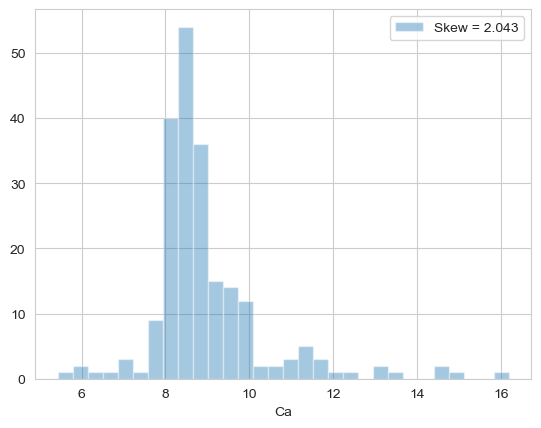

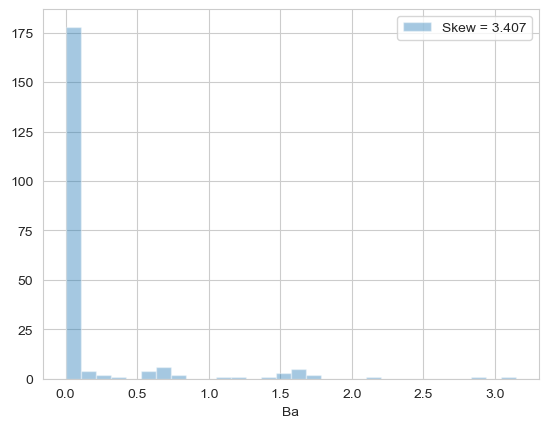

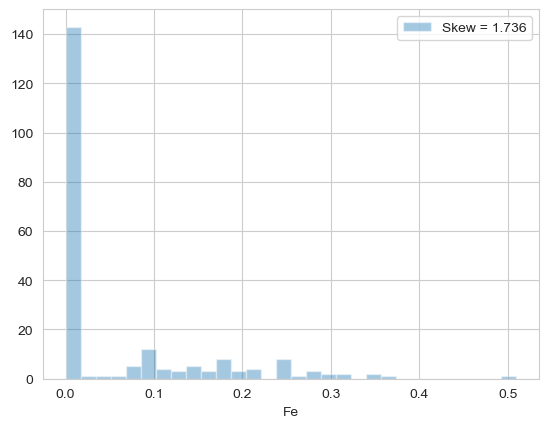

In [21]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    sns.set_style("whitegrid")
    plt.show()
    

* None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers.

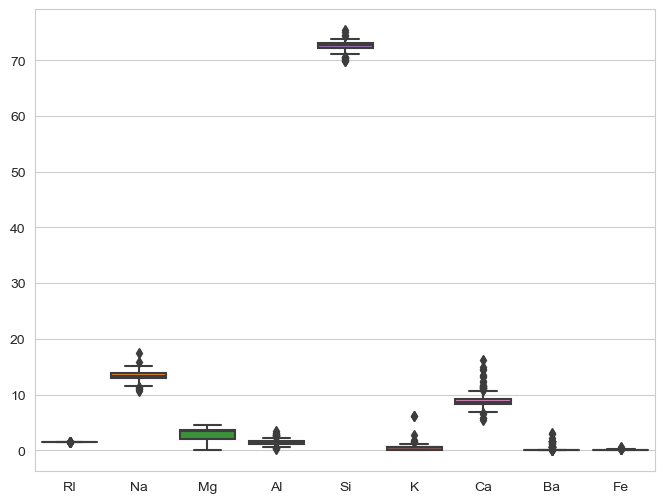

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[features])  # Pass the DataFrame directly to the `data` parameter
plt.show()

Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

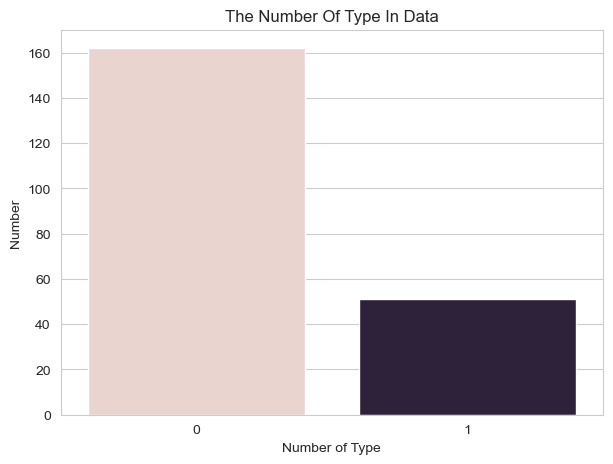

In [23]:
dataType = df["glass_type"].value_counts(dropna=False)
dataTypedf = np.array(dataType)
x = list(dataTypedf)
y = df['glass_type'].value_counts().index

plt.figure(figsize=(7,5))
sns.barplot(x = y, y = x, palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Number of Type")
plt.ylabel("Number")
plt.title("The Number Of Type In Data")
plt.show()

* first and second type are more in numbers as compared to others.

## Multivariate analysis

<Figure size 3000x2500 with 0 Axes>

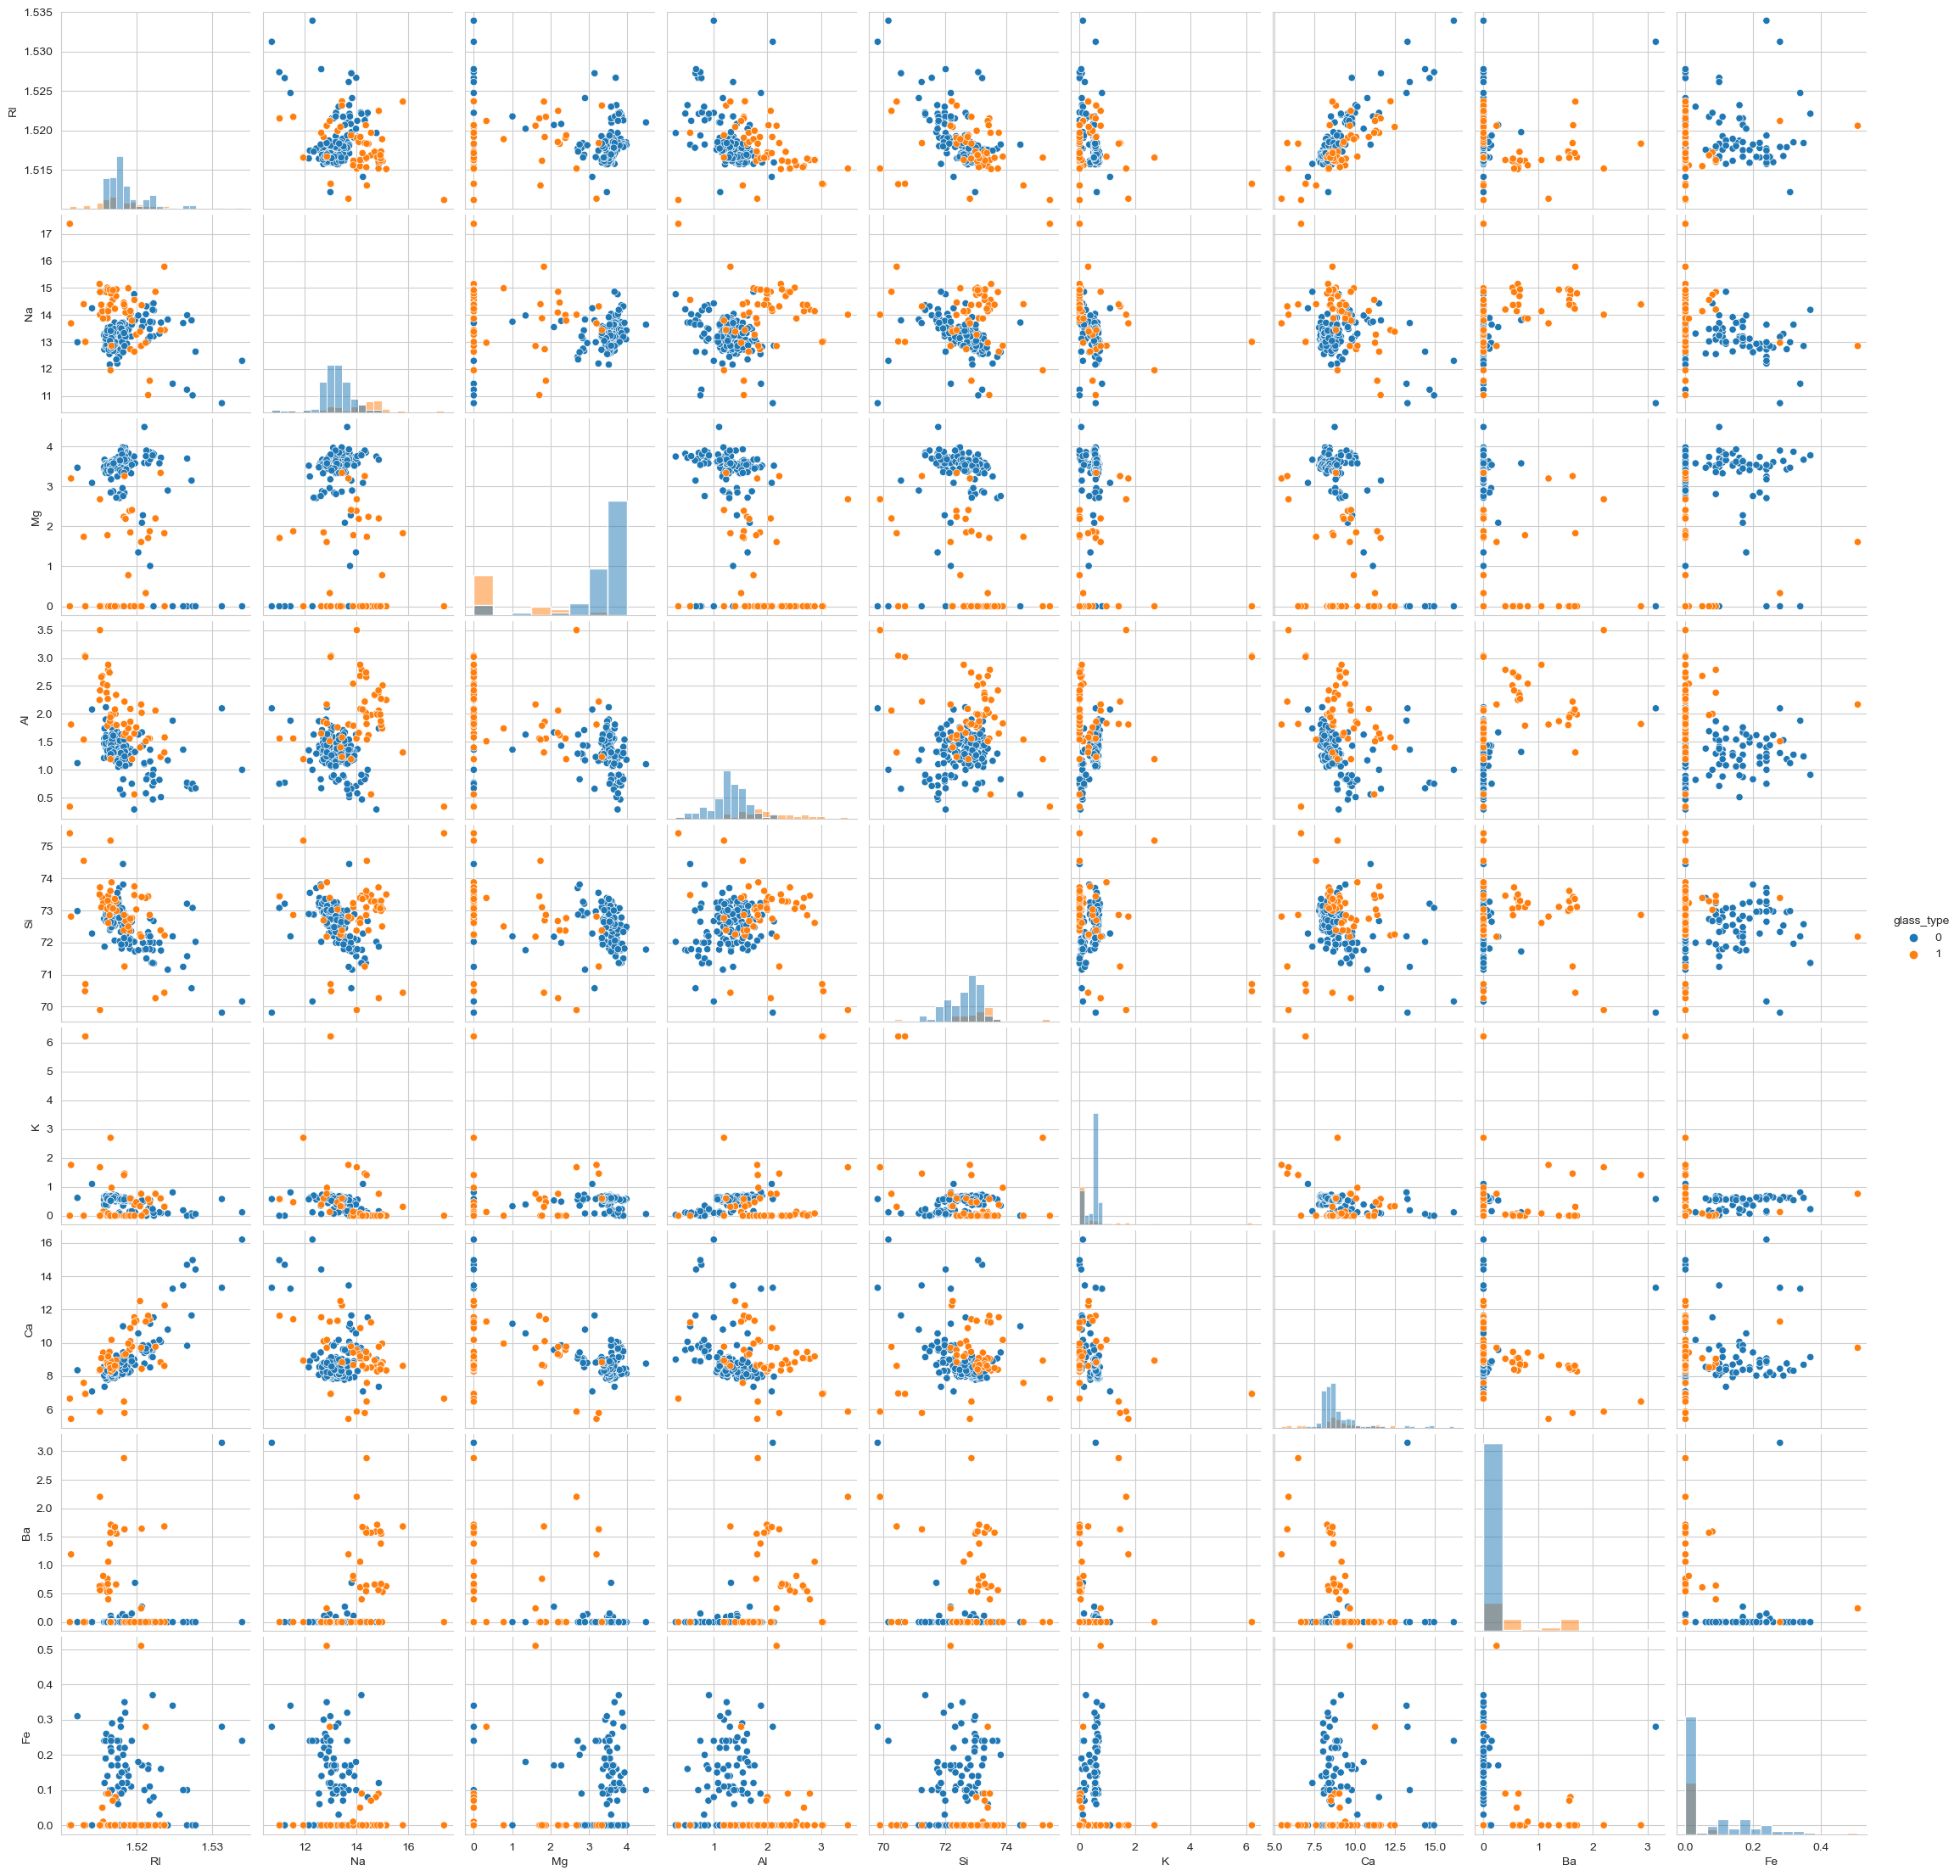

In [24]:
# pair plot
plt.figure(figsize=(30,25))

sns.pairplot(df,hue='glass_type',diag_kind ='hist')
plt.show()

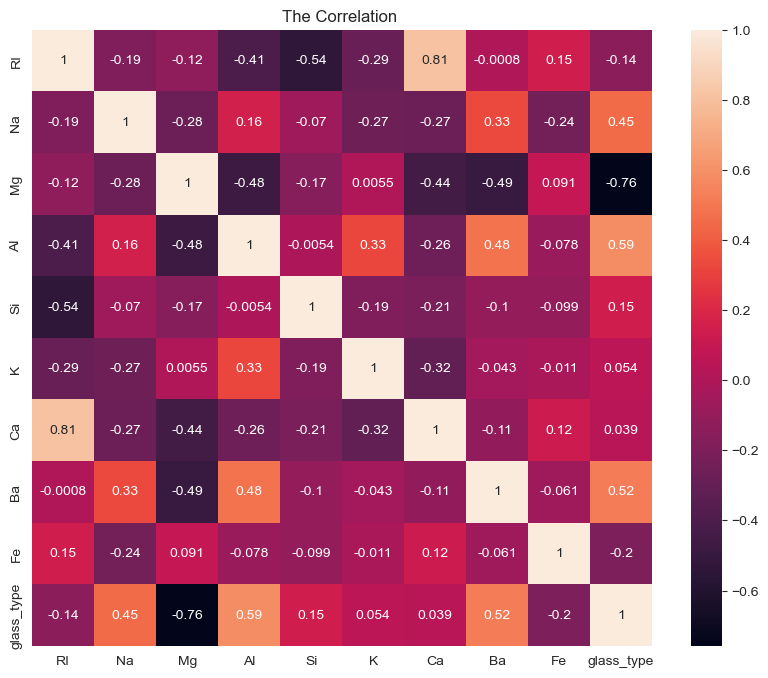

In [25]:
# checking correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,)
plt.title('The Correlation ')
plt.show()

There seems to be a strong positive correlation between RI and Ca. 

##  Hunting and removing multiple outlier

In [26]:
from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

df.shape

(193, 10)

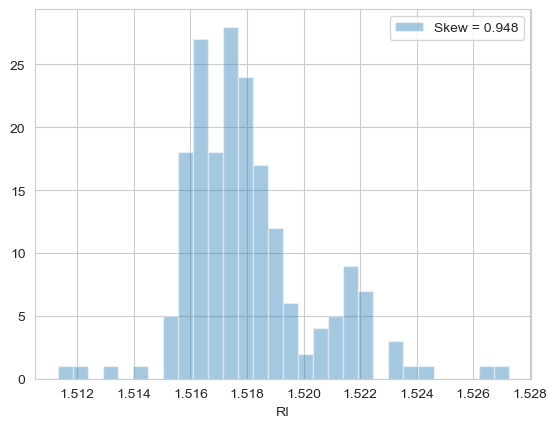

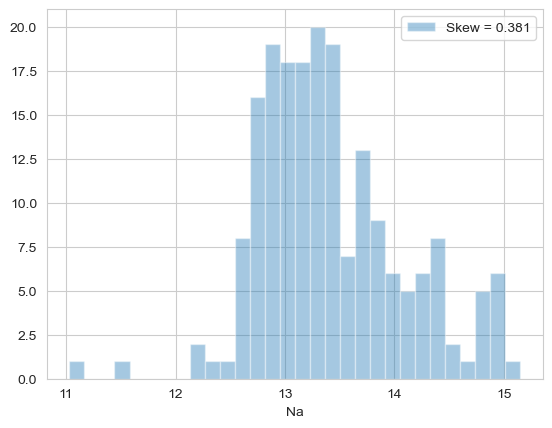

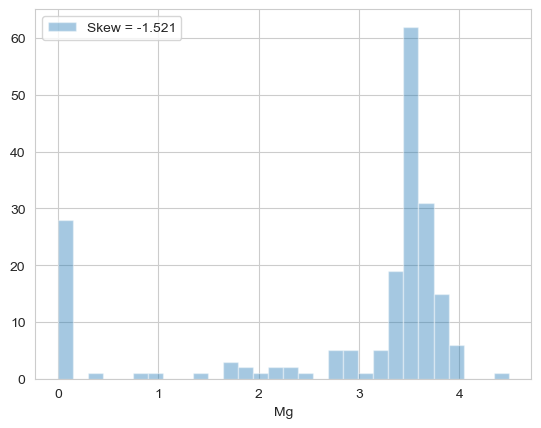

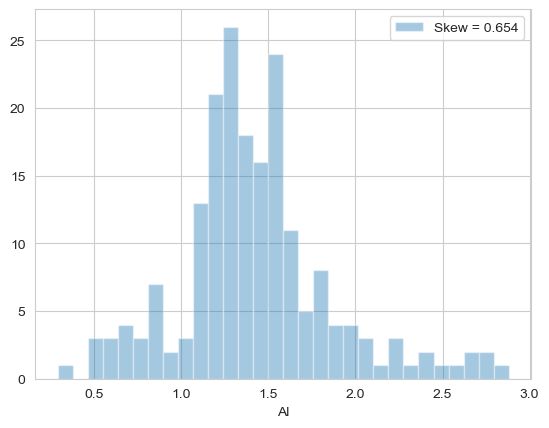

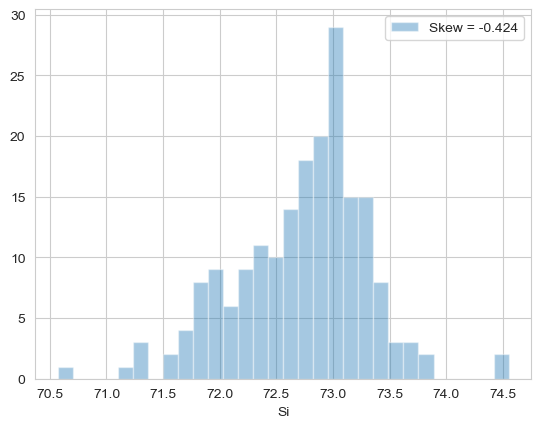

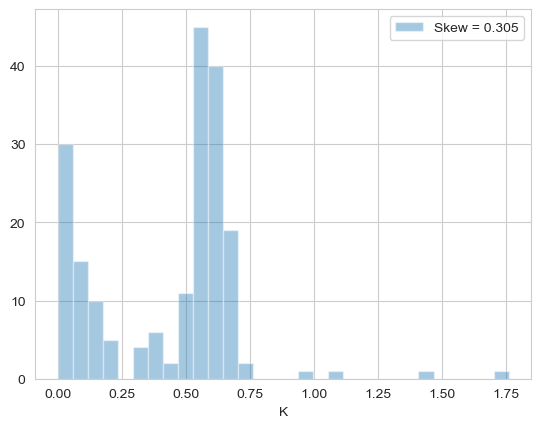

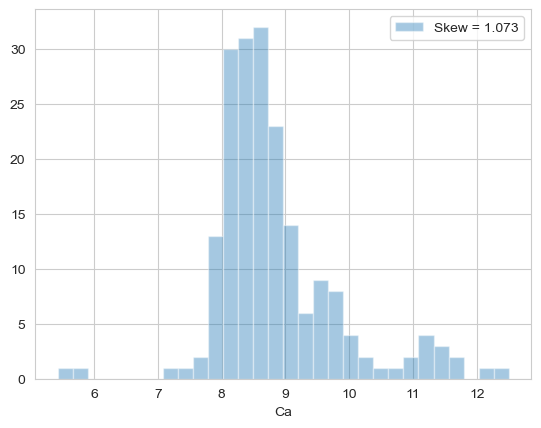

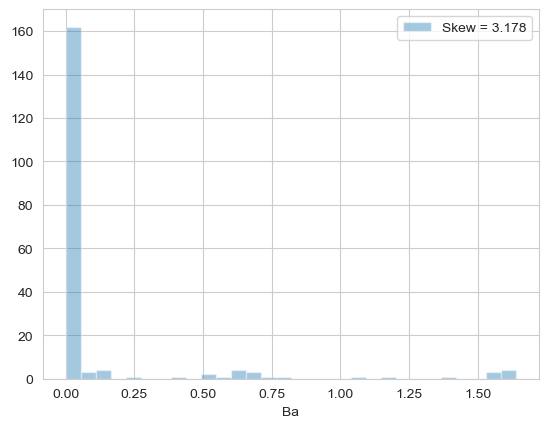

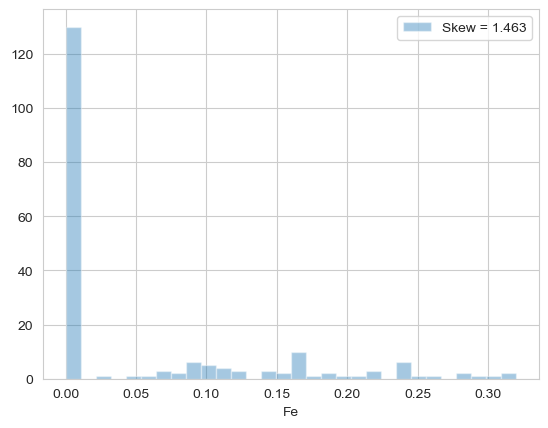

In [27]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [28]:
df.skew()

RI            0.947550
Na            0.381175
Mg           -1.520824
Al            0.654489
Si           -0.424118
K             0.305137
Ca            1.073331
Ba            3.178256
Fe            1.463077
glass_type    1.455790
dtype: float64

# Data Transformation

* Let's examine if a cuberoot can contribute to the normalization of some features. It should be emphasized that all transformations should only be done on the training set to avoid data snooping. Otherwise the test error estimation will be biased.

In [29]:
from numpy import cbrt

sw_features = ['Mg','Ca','Ba','Fe']

# Apply the Box-Cox transformation
df[sw_features] = df[sw_features].apply(lambda x: np.cbrt(x))

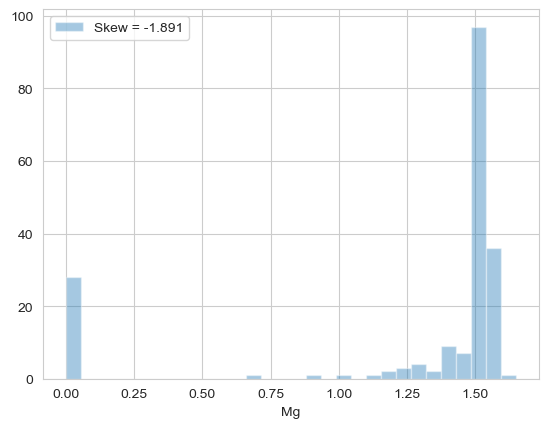

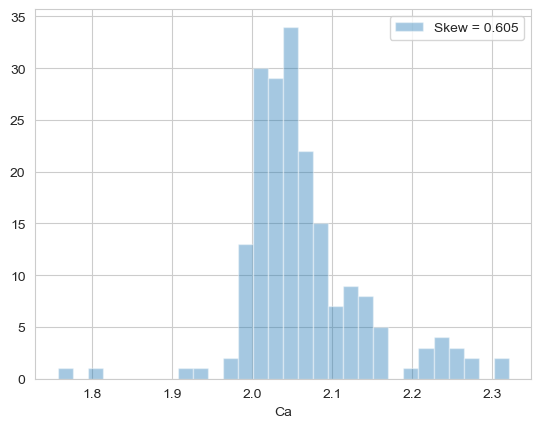

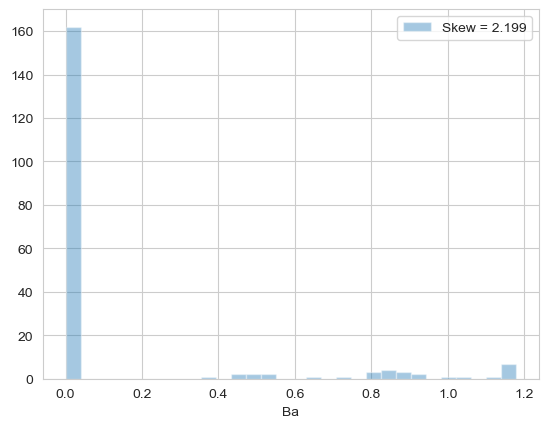

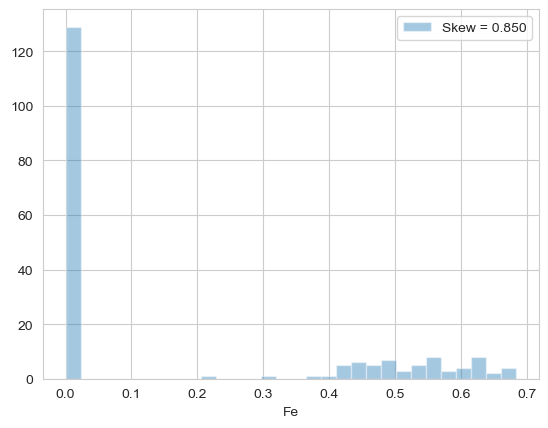

In [30]:
for feat in sw_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

* now the columns which are skewed now in better position .

In [31]:
# separating features and label 
X = df[features]

y = df['glass_type']
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



In [32]:
from sklearn import preprocessing
X=preprocessing.scale(X)
X_new = pd.DataFrame(X,columns=features)
X_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.287556,0.335341,0.701270,-0.727994,-1.608221,-1.315415,-0.046526,-0.416569,1.146254
1,-0.823325,0.171755,0.469429,0.263526,0.460681,-0.146300,-1.100159,-0.416569,-0.688589
2,-0.176512,-0.304134,0.506366,-0.299838,-0.189057,0.491399,-0.611968,-0.416569,-0.688589
3,-0.281401,-0.214905,0.488016,-0.412510,0.614567,0.420544,-0.776395,-0.416569,-0.688589
4,-0.919472,-0.928739,0.485376,0.443802,0.426485,0.739393,-0.776395,-0.416569,1.834446
...,...,...,...,...,...,...,...,...,...
188,-0.727177,1.420963,-2.377028,2.967670,0.221304,-1.527981,0.666314,2.063771,-0.688589
189,-0.801473,1.078918,-2.377028,3.283153,-0.189057,-1.244559,0.395672,2.689053,-0.688589
190,-0.530511,2.238897,-2.377028,1.277580,0.580370,-1.527981,-0.417276,3.138481,-0.688589
191,1.130223,1.406092,-2.377028,1.345183,1.195911,-1.527981,-0.374389,3.175362,-0.688589


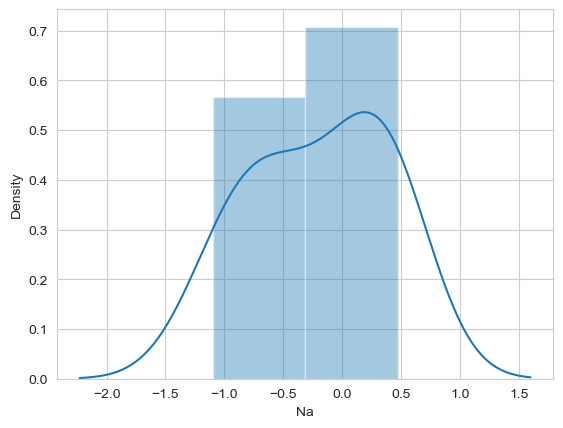

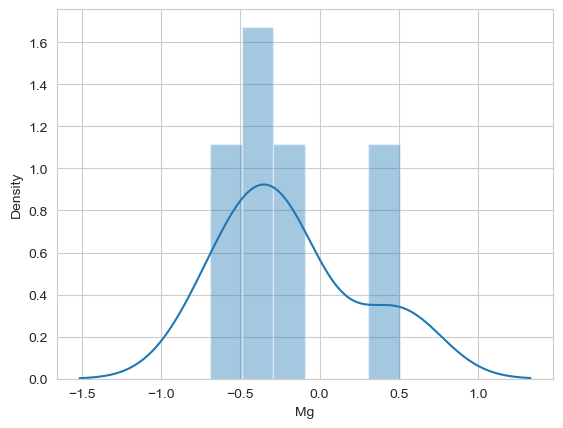

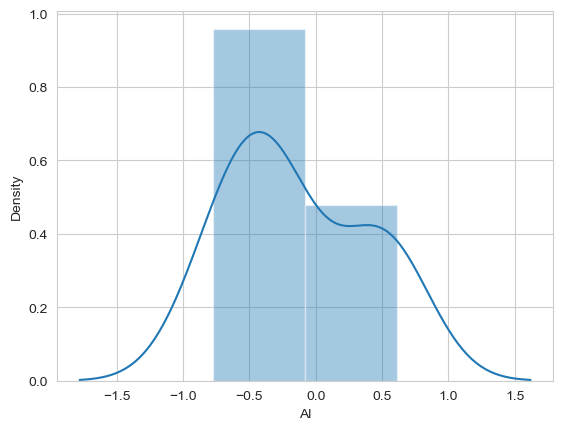

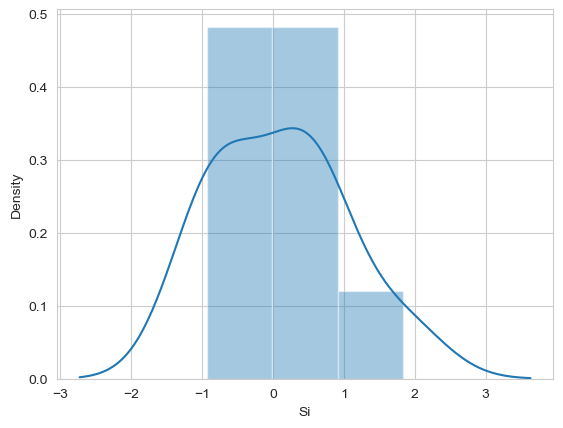

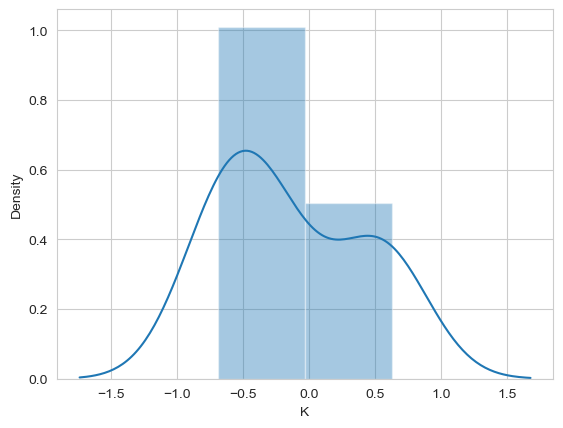

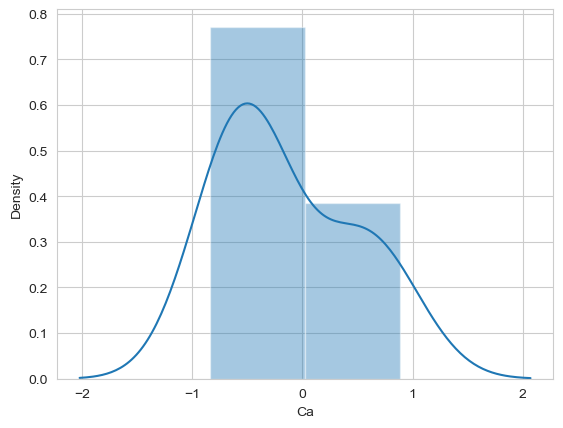

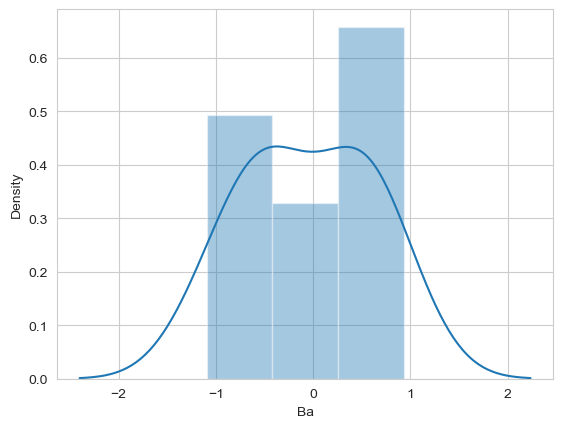

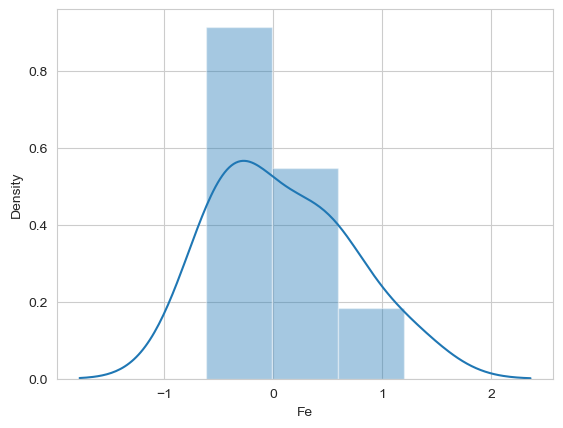

In [33]:
# plot the data after scaling

x = X

for i in range(1,9):
    sns.distplot(x[i])
    plt.xlabel(features[i])
    
    plt.show()

* after scaling the dataset seems to be normal in the distribution.

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

* the data in the target is pretty imbalanced some we used smote to fix this problem . now the both classes have equal values.

In [35]:
y_resampled.value_counts()

0    153
1    153
Name: glass_type, dtype: int64

In [36]:
X_resampled

array([[ 1.28755581,  0.33534146,  0.70126978, ..., -0.04652575,
        -0.41656857,  1.1462535 ],
       [-0.82332469,  0.17175462,  0.46942902, ..., -1.10015863,
        -0.41656857, -0.68858934],
       [-0.17651244, -0.30413436,  0.50636586, ..., -0.61196847,
        -0.41656857, -0.68858934],
       ...,
       [ 0.10304941,  1.54609567,  0.06508236, ...,  0.4803382 ,
        -0.41656857, -0.68858934],
       [-1.09341936,  0.67857586, -2.37702822, ...,  0.62586295,
         2.42350073,  0.16054696],
       [-0.36907209,  2.05333652, -2.37702822, ..., -0.25921916,
         3.13168268,  0.62957306]])

## split -out the validation data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

## Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Model Evaluation

# logistic regression 

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.94      0.94      0.94        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

Cross-Validation Scores: [0.8974359  0.82051282 0.8974359  0.89473684 0.97368421]
Mean Cross-Validation Score: 0.896761133603239


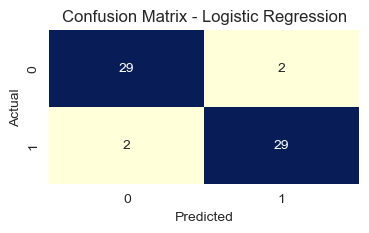

In [38]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.9927159209157128


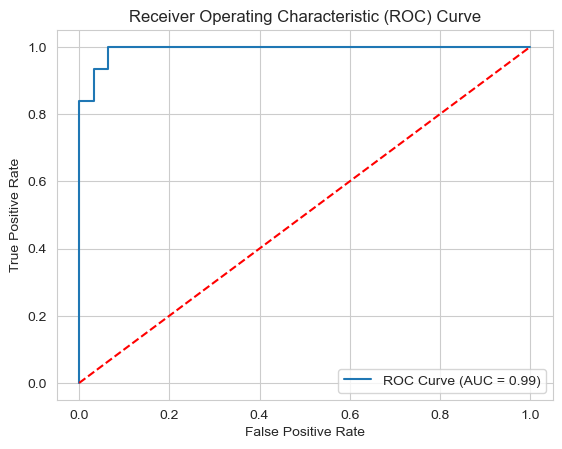

In [39]:
# ROC AUC SCORE
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.91      0.97      0.94        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

Cross-Validation Scores: [0.79487179 0.84615385 0.8974359  0.94736842 1.        ]
Mean Cross-Validation Score: 0.8971659919028341


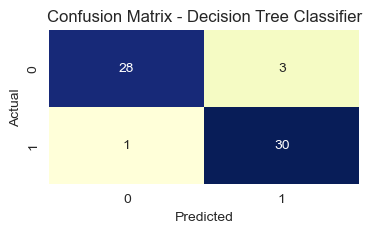

In [40]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.9630593132154006


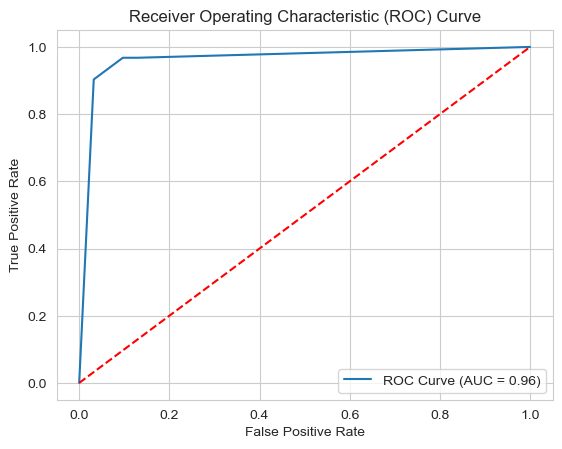

In [41]:
#ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Randomforest Classifier

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.82051282 0.8974359  0.8974359  0.89473684 0.97368421]
Mean Cross-Validation Score: 0.896761133603239


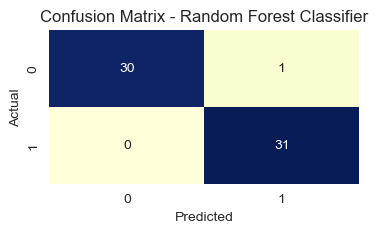

In [42]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 1.0


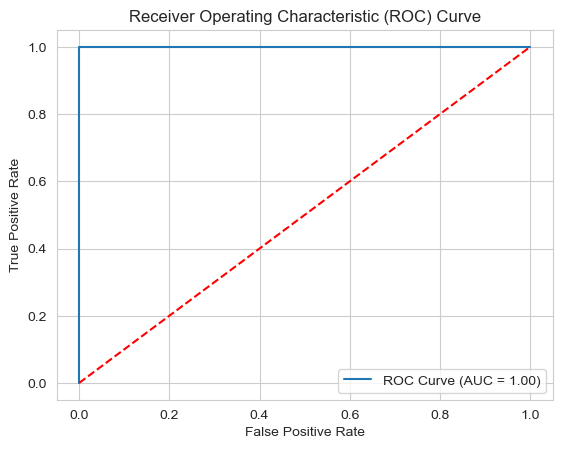

In [43]:
#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ExtraTrees Classifier

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.79487179 0.82051282 0.92307692 0.89473684 0.97368421]
Mean Cross-Validation Score: 0.8813765182186234


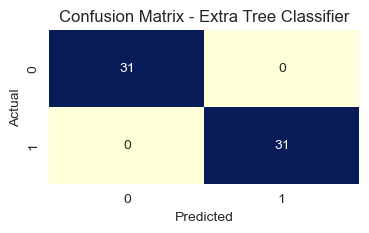

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 1.0


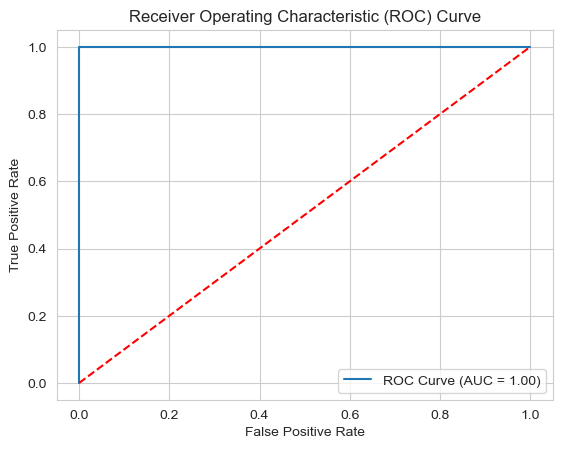

In [45]:
#ROC AUC Score
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
# SVC

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.82051282 0.84615385 0.8974359  0.92105263 0.97368421]
Mean Cross-Validation Score: 0.8917678812415654


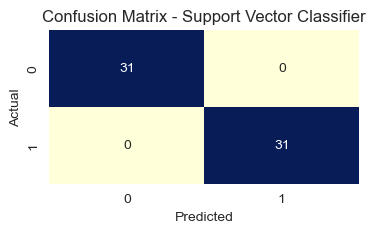

In [47]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 1.0


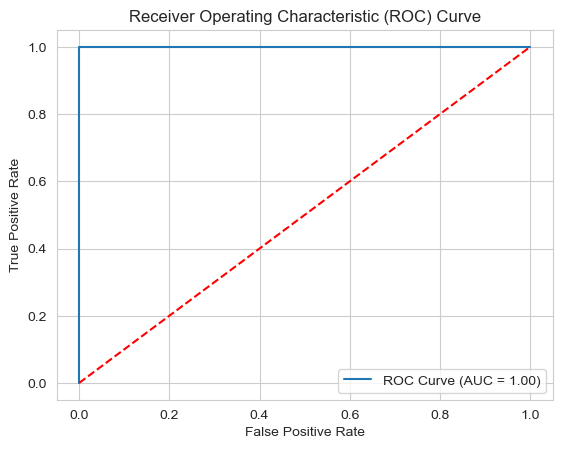

In [48]:
#ROC AUC Score
y_prob = best_SV.decision_function(X_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [49]:
#  KNeighborsClassifier

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.84615385 0.82051282 0.8974359  0.94736842 0.97368421]
Mean Cross-Validation Score: 0.8970310391363021


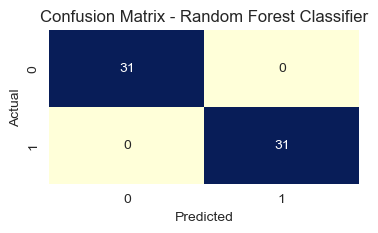

In [50]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



ROC AUC Score: 1.0


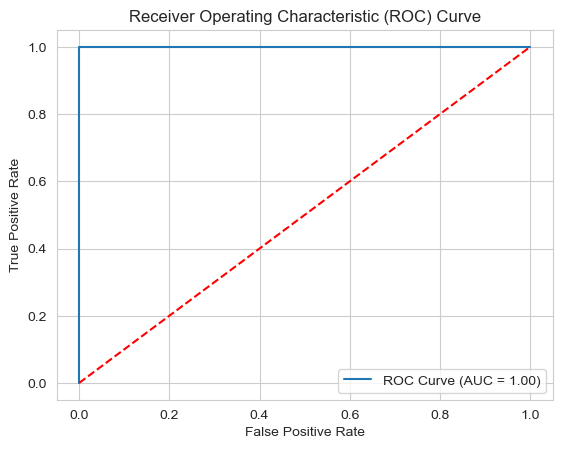

In [51]:
#ROC AUC Score
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1      Extra Tree Classifier        1.000000
2  Support Vector Classifier        1.000000
3     K Neighbour Classifier        1.000000
4   Random Forest Classifier        0.983871
5   Decision Tree Classifier        0.935484
6        Logistic Regression        0.935484


`After evaluating the performance of six models, it has been observed that the first three models are exhibiting signs of overfitting. Overfitting occurs when a model learns the training data too well and fails to generalize to unseen data. This results in poor performance when applied to new instances.
To address this issue, it is recommended to consider the fourth model. This model demonstrates better generalization capabilities, as it achieves a relatively high accuracy on both the training and testing data. The fourth model shows promise in capturing the underlying patterns in the data and is less likely to suffer from overfitting.
Therefore, based on the observed overfitting in the first theee models and the better generalization performance of the fourth model, it is advisable to proceed with the fourth model for further analysis and predictions.`

In [54]:
filename = 'ET.pkl'
pickle.dump(ET, open(filename, 'wb'))